In [1]:
from datetime import date
import requests
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

In [2]:
sns.set_theme(style="white")

for font in font_manager.findSystemFonts("fonts/Manrope"):
    font_manager.fontManager.addfont(font)
plt.rc("font", family="Manrope", size=14)
plt.rc("xtick", labelsize="medium")
plt.rc("ytick", labelsize="medium")
plt.rc(
    "axes",
    titlesize="large",
    titlelocation="left",
    titlepad=10,
    labelsize="large",
)
plt.rc("axes.spines", top=False, right=False, bottom=True, left=True)
plt.rc("figure", titlesize="x-large", titleweight="extra bold")
plt.rc("figure.constrained_layout", use=True)
plt.rc("legend", fontsize="medium", title_fontsize="large", frameon=False)

In [3]:
OURA_ACCESS_TOKEN = dotenv_values()["OURA_ACCESS_TOKEN"]

In [4]:
OURA_API_URL = "https://api.ouraring.com/v2/usercollection/{endpoint}"

In [5]:
url = OURA_API_URL.format(endpoint="daily_readiness")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [6]:
daily_readiness = pd.json_normalize(response.json()["data"])
daily_readiness.set_index("id", inplace=True)
daily_readiness["day"] = pd.to_datetime(
    daily_readiness["day"]).dt.to_period("D")
daily_readiness["timestamp"] = pd.to_datetime(
    daily_readiness["timestamp"], utc=True)
daily_readiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 9accdec6-a27e-43c1-afe2-32f66ab65e6a to 2261835d-bbe6-4f47-bd8c-dc85630377ac
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   day                                 137 non-null    period[D]          
 1   score                               137 non-null    int64              
 2   temperature_deviation               136 non-null    float64            
 3   temperature_trend_deviation         135 non-null    float64            
 4   timestamp                           137 non-null    datetime64[ns, UTC]
 5   contributors.activity_balance       126 non-null    float64            
 6   contributors.body_temperature       136 non-null    float64            
 7   contributors.hrv_balance            131 non-null    float64            
 8   contributors.previous_day_activity  126 non-null    float

In [7]:
url = OURA_API_URL.format(endpoint="daily_sleep")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [8]:
daily_sleep = pd.json_normalize(response.json()["data"])
daily_sleep.set_index("id", inplace=True)
daily_sleep["day"] = pd.to_datetime(daily_sleep["day"]).dt.to_period("D")
daily_sleep["timestamp"] = pd.to_datetime(daily_sleep["timestamp"], utc=True)
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 88473e7b-abeb-4901-af7d-6e93b2ecc40e to e97cb4ee-54d0-4343-8c45-3a2897ff0a8c
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   day                       137 non-null    period[D]          
 1   score                     137 non-null    int64              
 2   timestamp                 137 non-null    datetime64[ns, UTC]
 3   contributors.deep_sleep   137 non-null    int64              
 4   contributors.efficiency   137 non-null    int64              
 5   contributors.latency      137 non-null    int64              
 6   contributors.rem_sleep    137 non-null    int64              
 7   contributors.restfulness  137 non-null    int64              
 8   contributors.timing       137 non-null    int64              
 9   contributors.total_sleep  137 non-null    int64              
dtypes: datetime64[ns, UTC](

In [9]:
url = OURA_API_URL.format(endpoint="daily_activity")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [10]:
daily_activity = pd.json_normalize(response.json()["data"])
daily_activity.set_index("id", inplace=True)
daily_activity["day"] = pd.to_datetime(daily_activity["day"]).dt.to_period("D")
daily_activity["timestamp"] = pd.to_datetime(
    daily_activity["timestamp"], utc=True)
samples_columns = ["class_5_min", "met.interval", "met.items", "met.timestamp"]
daily_activity["met.timestamp"] = pd.to_datetime(
    daily_activity["met.timestamp"], utc=True
)
daily_activity["score"] = daily_activity["score"].where(daily_activity["score"] > 0)
daily_activity_samples = daily_activity[samples_columns].copy()
daily_activity.drop(columns=samples_columns, inplace=True)
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 6950c724-9f7f-4784-8b66-8343970a12ef to 5eb6d515-05ed-4cd5-b4e3-3db35387102d
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   score                            130 non-null    float64            
 1   active_calories                  142 non-null    int64              
 2   average_met_minutes              142 non-null    float64            
 3   equivalent_walking_distance      142 non-null    int64              
 4   high_activity_met_minutes        142 non-null    int64              
 5   high_activity_time               142 non-null    int64              
 6   inactivity_alerts                142 non-null    int64              
 7   low_activity_met_minutes         142 non-null    int64              
 8   low_activity_time                142 non-null    int64              
 9   medium_activi

In [11]:
url = OURA_API_URL.format(endpoint="sleep")
headers = {"Authorization": f"Bearer {OURA_ACCESS_TOKEN}"}
params = {
    "start_date": date(date.today().year - 1, 1, 1).isoformat(),
    "end_date": date.today().isoformat(),
}
response = requests.get(url, params, headers=headers)

In [12]:
sleep = pd.json_normalize(response.json()["data"])
sleep.set_index("id", inplace=True)
sleep["day"] = pd.to_datetime(sleep["day"]).dt.to_period("D")
sleep["bedtime_start"] = pd.to_datetime(sleep["bedtime_start"], utc=True)
sleep["bedtime_end"] = pd.to_datetime(sleep["bedtime_end"], utc=True)
sleep["hrv.timestamp"] = pd.to_datetime(sleep["hrv.timestamp"], utc=True)
sleep["heart_rate.timestamp"] = pd.to_datetime(sleep["heart_rate.timestamp"], utc=True)
samples_columns = [
    "movement_30_sec",
    "sleep_phase_5_min",
    "hrv.timestamp",
    "hrv.interval",
    "hrv.items",
    "heart_rate.timestamp",
    "heart_rate.interval",
    "heart_rate.items",
]
sleep_samples = sleep[samples_columns].copy()
sleep.drop(columns=samples_columns + ["hrv", "heart_rate"], inplace=True)
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 60de1520-a18a-46f5-91c0-3e176586eb75 to f54ada3c-d7dd-4e2a-90f2-ca8d641b6a04
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   average_breath                                165 non-null    float64            
 1   average_heart_rate                            165 non-null    float64            
 2   average_hrv                                   143 non-null    float64            
 3   awake_time                                    165 non-null    int64              
 4   bedtime_end                                   165 non-null    datetime64[ns, UTC]
 5   bedtime_start                                 165 non-null    datetime64[ns, UTC]
 6   day                                           165 non-null    period[D]          
 7   deep_sleep_duration                         

Text(0.054828499999999995, 0.98, 'Readiness, Sleep and Activity Scores')

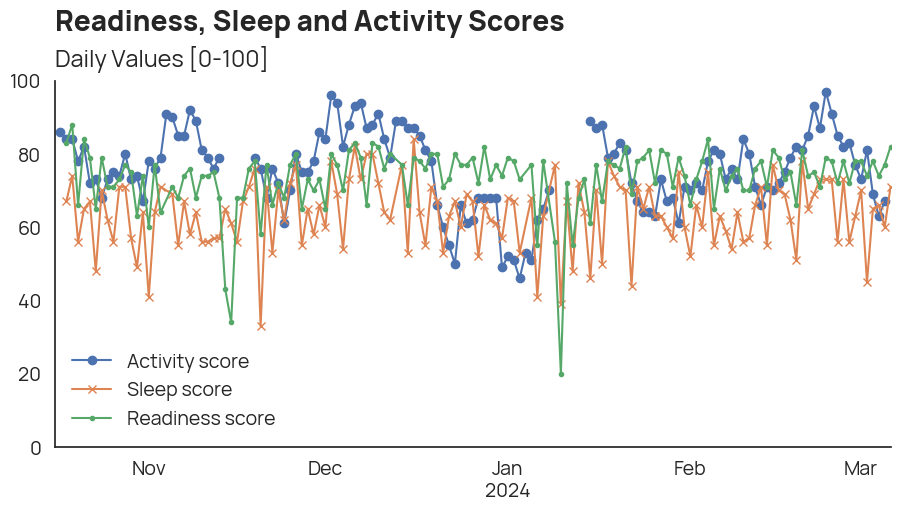

In [13]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_activity.plot(x="day", y="score", marker="o",
                    ax=ax, label="Activity score")
daily_sleep.plot(x="day", y="score", marker="x", ax=ax, label="Sleep score")
daily_readiness.plot(x="day", y="score", marker=".",
                     ax=ax, label="Readiness score")
ax.set_xlabel("")
ax.set_title("Daily Values [0-100]", loc="left", size="large")
ax.set_ylim(0, 100)
fig.canvas.draw()
fig.suptitle(
    "Readiness, Sleep and Activity Scores",
    x=ax.get_position().x0,
    ha="left",
)

In [14]:
daily_readiness["score_7DMA"] = daily_readiness.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()
daily_sleep["score_7DMA"] = daily_sleep.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()
daily_activity["score_7DMA"] = daily_activity.rolling("7D", on="day", min_periods=3)[
    "score"
].mean()

Text(0.054828499999999995, 0.98, 'Readiness, Sleep and Activity Scores')

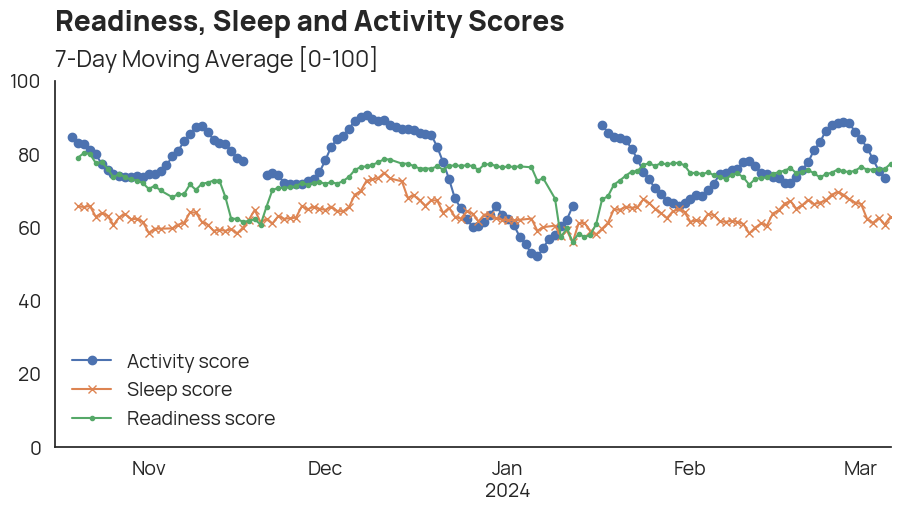

In [15]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_activity.plot(x="day", y="score_7DMA", marker="o",
                    ax=ax, label="Activity score")
daily_sleep.plot(x="day", y="score_7DMA", marker="x",
                 ax=ax, label="Sleep score")
daily_readiness.plot(
    x="day", y="score_7DMA", marker=".", ax=ax, label="Readiness score"
)
ax.set_xlabel("")
ax.set_title("7-Day Moving Average [0-100]", loc="left", size="large")
ax.set_ylim(0, 100)
fig.canvas.draw()
fig.suptitle(
    "Readiness, Sleep and Activity Scores",
    x=ax.get_position().x0,
    ha="left",
)

Text(0.0869535, 0.98, 'Readiness vs Sleep Scores')

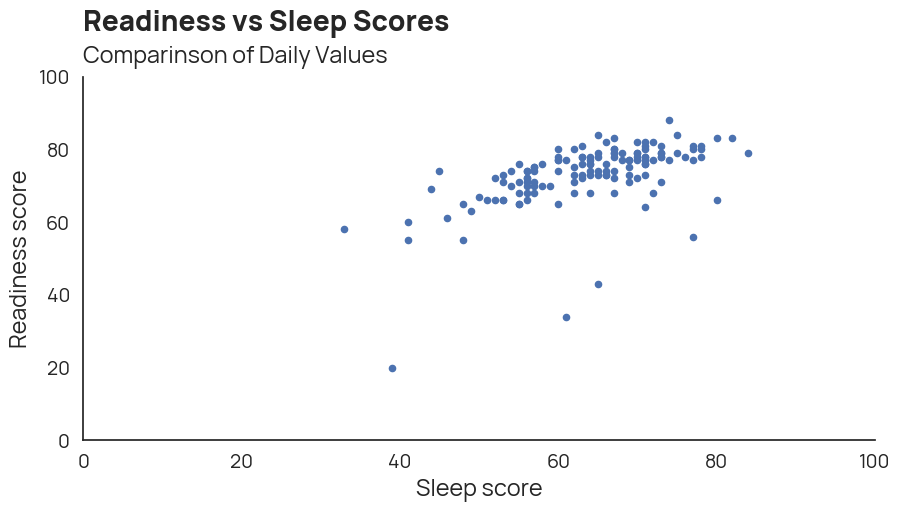

In [16]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_readiness[["day", "score"]].join(
    daily_sleep[["day", "score"]].set_index("day"),
    on="day",
    lsuffix="_readiness",
    rsuffix="_sleep",
).plot(kind="scatter", x="score_sleep", y="score_readiness", ax=ax)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel("Sleep score")
ax.set_ylabel("Readiness score")
ax.set_title("Comparinson of Daily Values")
fig.canvas.draw()
fig.suptitle("Readiness vs Sleep Scores", x=ax.get_position().x0, ha="left")

In [17]:
# Correlation between daily readiness and sleep scores
daily_readiness_sleep = daily_readiness[["day", "score"]].join(
    daily_sleep[["day", "score"]].set_index("day"), on="day", lsuffix="_readiness", rsuffix="_sleep"
)
daily_readiness_sleep[['score_readiness', 'score_sleep']].corr()

,score_readiness,score_sleep
score_readiness,1.000000,0.559317
score_sleep,0.559317,1.000000


Text(0.0869535, 0.98, 'Readiness vs Activity Scores')

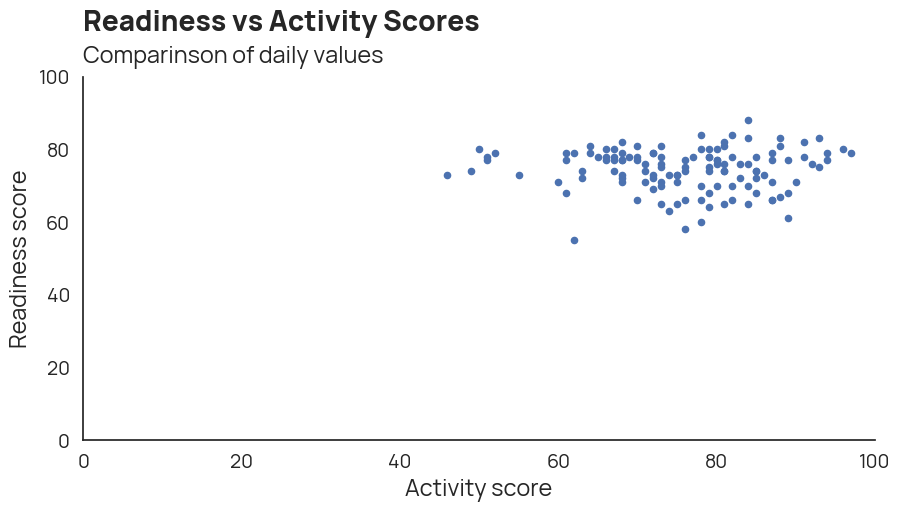

In [18]:
fig, ax = plt.subplots(figsize=(80 / 9, 5))
daily_readiness[["day", "score"]].join(
    daily_activity[["day", "score"]].set_index("day"),
    on="day",
    lsuffix="_readiness",
    rsuffix="_activity",
).plot(kind="scatter", x="score_activity", y="score_readiness", ax=ax)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xlabel("Activity score")
ax.set_ylabel("Readiness score")
ax.set_title("Comparinson of daily values")
fig.canvas.draw()
fig.suptitle("Readiness vs Activity Scores", x=ax.get_position().x0, ha="left")

In [19]:
# Correlation between daily readiness and activity scores
daily_readiness_activity = daily_readiness[["day", "score"]].join(
    daily_activity[["day", "score"]].set_index("day"), on="day", lsuffix="_readiness", rsuffix="_activity"
)
daily_readiness_activity[['score_readiness', 'score_activity']].corr()

,score_readiness,score_activity
score_readiness,1.000000,-0.012669
score_activity,-0.012669,1.000000


In [20]:
sleep_samples.columns

Index(['movement_30_sec', 'sleep_phase_5_min', 'hrv.timestamp', 'hrv.interval',
       'hrv.items', 'heart_rate.timestamp', 'heart_rate.interval',
       'heart_rate.items'],
      dtype='object')